In [1]:
# Importing the necessary libraries
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

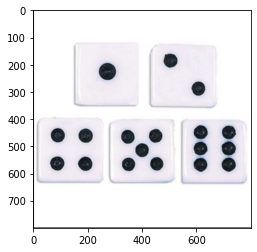

(<matplotlib.image.AxesImage at 0x1d27bdccc70>, None)

In [2]:
# Read in an image and correct for colorspace
img = cv2.imread("./input/dice.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot the image
plt.imshow(img), plt.show()

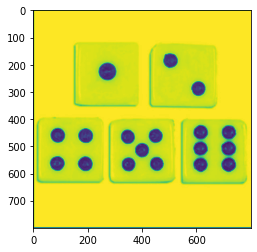

(<matplotlib.image.AxesImage at 0x1d27c0c5520>, None)

In [3]:
# Create clones and grayscale version of the image
img_clone = img.copy()
img_clone1 = img.copy()

# Create greyscale version of the image
img_clone = cv2.cvtColor(img_clone, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blurring order to soften image
img_clone = cv2.GaussianBlur(img_clone, (5, 5), 0)
plt.imshow(img_clone), plt.show()

In [4]:
# Threshold the image
ret, img_thresh = cv2.threshold(img_clone, 207, 255, cv2.THRESH_BINARY)

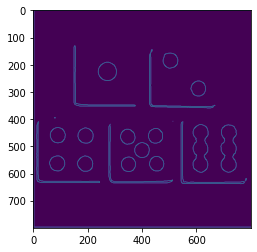

(<matplotlib.image.AxesImage at 0x1d27c140250>, None)

In [5]:
# Use Canny Edge Detection
img_canny = cv2.Canny(img_thresh, 2, 2*2, 5)
plt.imshow(img_canny), plt.show()

In [6]:
def calculate_value(roi):
    """ This function takes in the Region of Interests and 
    returns the total number of RoIs."""
    # Set up the detector with default parameters
    params = cv2.SimpleBlobDetector_Params()
    
    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.5

    detector = cv2.SimpleBlobDetector_create(params)
    key_points = detector.detect(roi)
    
    return len(key_points)

In [7]:
# Get the contours of the dice
contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
for i in range(len(contours)):
    # Find the area
    contours_area = cv2.contourArea(contours[i])
    
    # Get the region of interest (for the particular die)
    x, y, w, h = cv2.boundingRect(contours[i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)
    dice_roi = img_clone1[y: (y + h), x: (x + w)]
    
    # Calculate the number of RoIs
    number = calculate_value(dice_roi)
    
    # Label the dice with its number of dots
    img = cv2.putText(img, str(number), (x, y + h), cv2.FONT_HERSHEY_COMPLEX_SMALL, 5, (0, 255, 0), 5)

In [9]:
# Label the total number of dots
img = cv2.putText(img, "Total: " + str(number), (25, 75), cv2.FONT_HERSHEY_COMPLEX_SMALL, 5, (0, 255, 0), 5)
cv2.drawContours(img, contours, -1, (0, 0, 255), 5)

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[255,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0,   0],
        [255,   0,   0],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

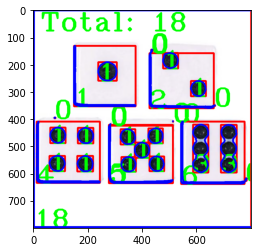

True

In [10]:
# Plot the result
plt.imshow(img), plt.show()

# Save the result
outputName = 'output_dice.png'
outputPath = "./output"
cv2.imwrite(os.path.join(outputPath,outputName), img)